<a href="https://colab.research.google.com/github/ishaPo/AI_ML_Projects/blob/main/Major_Project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Main Aim of the Project: Using CNN Image Classifier to classify pictures of people as happy and sad**

In [ ]:
!pip list
# we will be using majorly the following libraries
'''
tensorflow - for deep learning
open-cv - for image processing
matplotlib - visualization
'''

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
catalogue                     2.0.8
certifi                       2022.12.7


In [ ]:
!pip install tensorflow-gpu==2.8.0 # for acceleration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: tensorboard
    Found exist

In [ ]:
import tensorflow as tf
import os

In [ ]:
# listing gpus
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
# limiting memory use by tensor flow to avoid OOM errors
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

[]


# we have collected our own data using following steps


---


1.   Add chrome extension named 'Download All Images'
2.   Search happy people on Chrome
3.   Download all images using the extension
4.   Upload all downloaded photos to a folder in collab



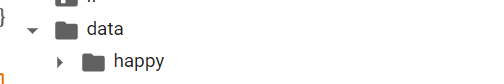


The folder structure is like the one above, that I followed.
all photos are under the folder happy
Follwing the same for the dataset of sad people

The data structure is now like the one below

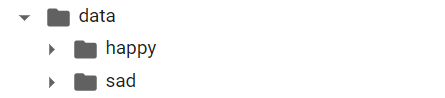

In [ ]:
## data Cleaning
## Removing Dodgy Images
## Importing required libraries for the same
import cv2, imghdr

In [ ]:
# creating a variable that stores the path to the data directory
data_dir = '//content//main_data'
# list of valid image extensions
img_exts = ['jpeg','jpg','bmp','png']

In [ ]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [ ]:
for image_class in os.listdir(data_dir)[1:]:
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      image = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with Image {}'.format(image_path))


 Output for code above in ss below

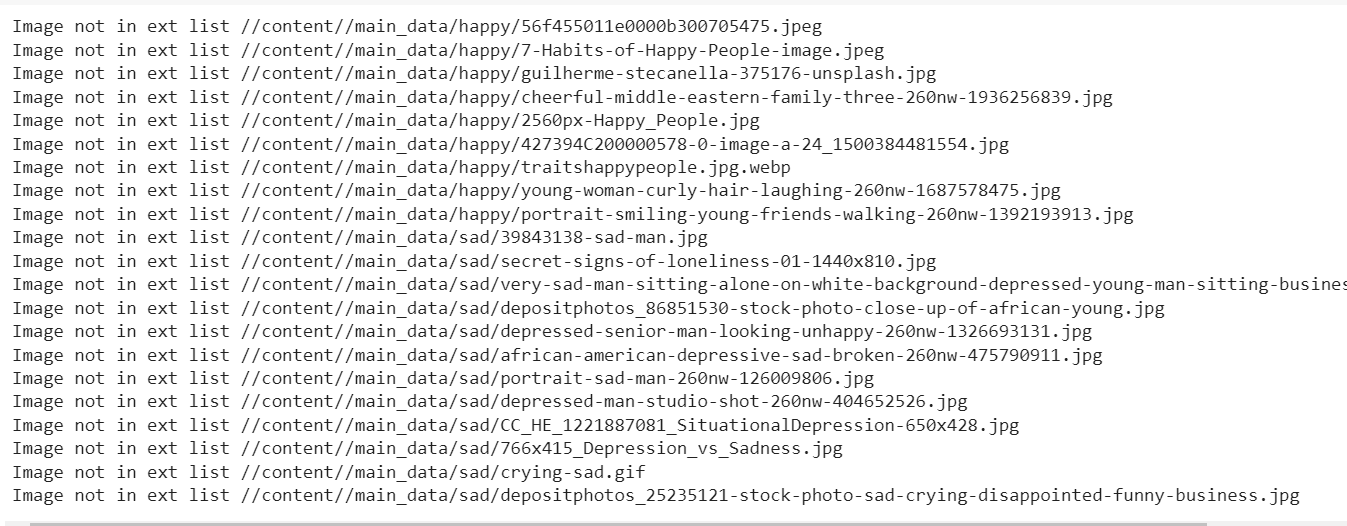

**EDA**

In [ ]:
## Loading Dataset
# importing libraries for the same
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# storing the images in a variable called data after using keras utility tools
# on it
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 159 files belonging to 3 classes.


[['happy', 92], ['sad', 67]]


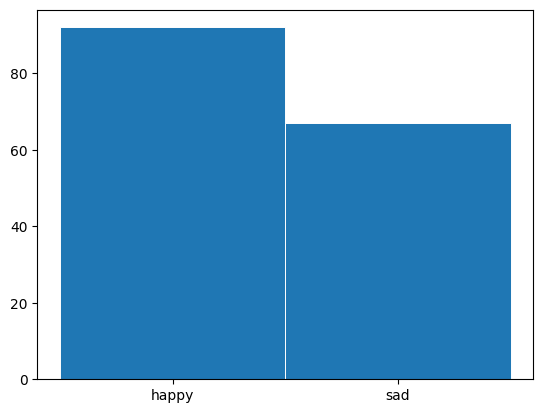

In [ ]:
from PIL import Image # importing

nos = []
for image_class in os.listdir(data_dir)[1:]:
  no = 0
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    no += 1
    # print(image_path)
  nos.append([f'{image_class}',no])
# print(nos)

x = []
for i in range(len(nos)):
  x.append(nos[i][0])

y = []
for i in range(len(nos)):
  y.append(nos[i][1])

# displaying the number of images each folder contains
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)


plt.show()

# thus this clearly shows which class has how much data or how many pictures

2


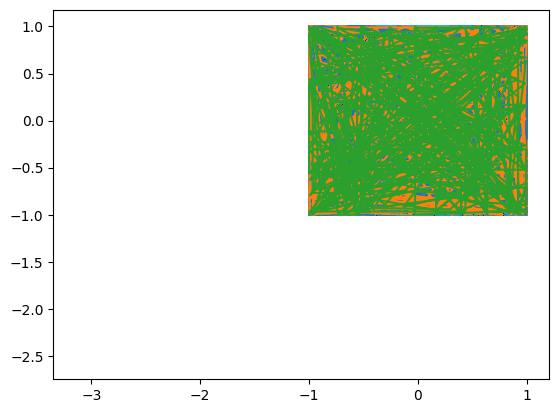

In [ ]:
vals  = []
for image_class in os.listdir(data_dir)[1:]:
  val = []
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    img = Image.open(image_path)
    # print(np.array(img))
    value = [np.linspace(-np.pi, np.pi, 12),np.sin(np.array(img))]
    value.append(val)
  vals.append(value)
print(len(vals))

for i in range(len(vals)):
  for j in range(len(vals[i])):
    for k in range(len(vals[i][j])):
      plt.plot(vals[i][j][0],vals[i][j][1])


plt.show()

# the representation of the sin of the array (fft of the image)
# in a particular range

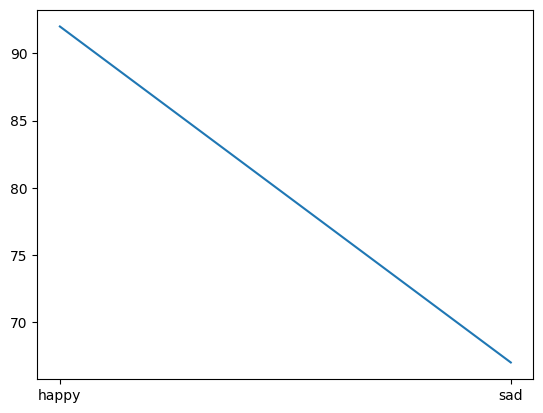

In [ ]:
nos = []
for image_class in os.listdir(data_dir)[1:]:
  no = 0
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    no += 1
    # print(image_path)
  nos.append([f'{image_class}',no])
# print(nos)

x = []
for i in range(len(nos)):
  x.append(nos[i][0])

y = []
for i in range(len(nos)):
  y.append(nos[i][1])

# displaying the number of images each folder contains
fig, ax = plt.subplots()

ax.plot(x, y)


plt.show()

# this graph shows the decrease in the number of dataset points in both datasets
# the line is higher towards the class of dataset with higher pictures
# and lower for lesser ones

In [ ]:

# creating numpy iterator to easily go through the data
data_iterator = data.as_numpy_iterator()
print(batch[0].shape) # images reprented as numpy arrays
print(batch[1]) # image labels, i.e. -> is the image of either happy class
# or sad class

(32, 256, 256, 3)
[2 2 1 2 1 1 2 2 1 2 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 2 1 1]


In [ ]:
batch = data_iterator.next() # going to next batch of images

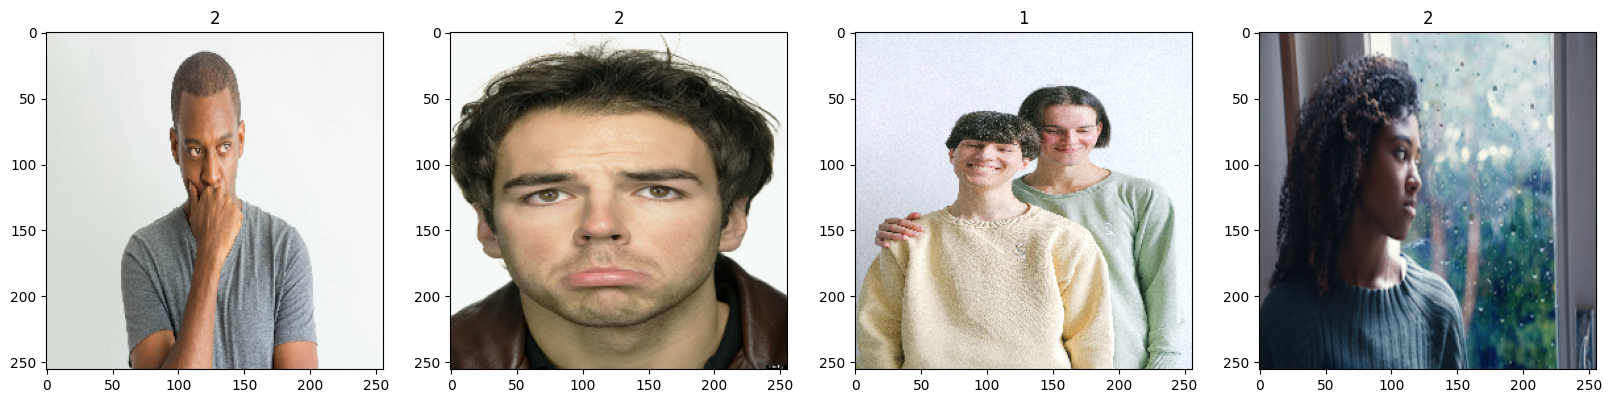

In [ ]:
# visualizing which image is assigned to which class
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# if we run data_iterator.next() it goes to the next batch of images

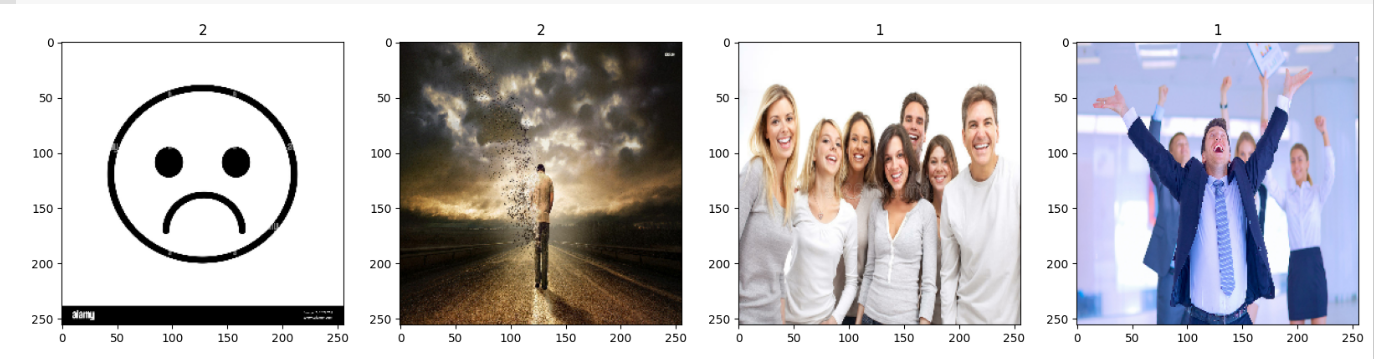




Thus, we can see that 2 is for sad and 1 is for happy

In [ ]:
## Preprocessing data
# scalling images
data = data.map(lambda x, y: (x/255,y))

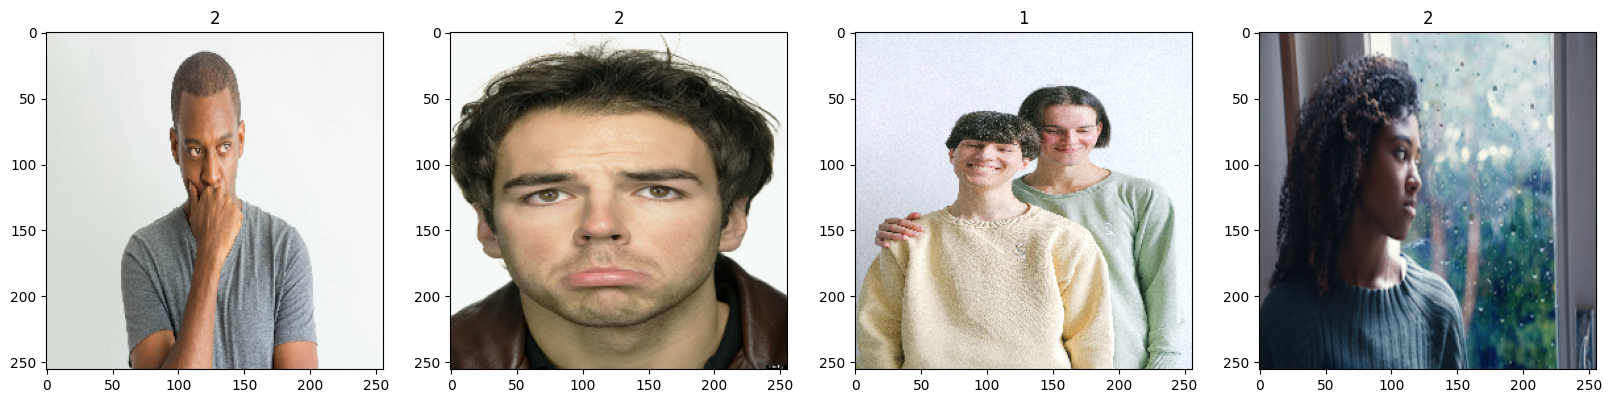

In [ ]:
# visualizing which image is assigned to which class
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype('uint8')) # not converting to int here as images range between 0 to 1
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
## Splitting Data into Training and Test data
train_size = int(len(data)*0.7)-1
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [ ]:
train_size + val_size + test_size == len(data)
# checking if batches can exist in the correct number

True

In [ ]:
# making the required partition of batches for training the model
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**CNN IMAGE CLASSIFIER MODEL**

In [ ]:
# simpler models for quick input and output
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# conv2d - convolution layer
# maxpooling - condensation layer, goes over all images and condenses the information
# flatten - for going from one layer to the next

In [ ]:
# when building a neural network, we build a a lot of hidden layers which form a network
model = Sequential() # making model

In [ ]:
# now adding the layer on top of the model
# 16 filters, filter is 3x3 pixels in size, 1 stride i.e. moving one pixel at a
# time, activation function, shape of input image
model.add( Conv2D( 16,(3,3), 1, activation='relu',input_shape = (256,256,3) ) )
model.add(MaxPooling2D()) # condenses down the information from the previous layer

model.add( Conv2D( 32,(3,3), 1, activation='relu') ) # another layer
model.add(MaxPooling2D()) # condenses down the information from the previous layer

model.add( Conv2D( 16,(3,3), 1, activation='relu') ) # another layer
model.add(MaxPooling2D()) # condenses down the information from the previous layer

model.add(Flatten()) # flattening values from previous layer to be used as input
# for next layers

# fully connected layers
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # finally 1 value as ouput

In [ ]:
# compile
# adam optimizer, loss, mteric which we want to track
model.compile('adam', loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary() # to see how the model transforms our data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

**Training the model**

In [ ]:
## training the dataset
## create a folder named logs
logdir = '/content/logs'

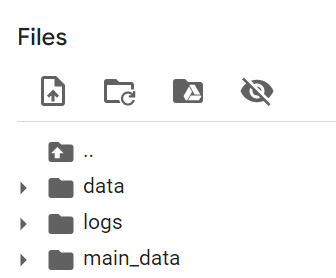

In [ ]:
# callback
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
# fitting or training the model
# training data, how many iterations we will train for, validation data, callback
hist = model.fit(train, epochs = 20, validation_data=val, callbacks = [tensorflow_callback])

Epoch 1/20
2/2 [==============================] - 13s 7s/step - loss: -1.0794 - accuracy: 0.2969 - val_loss: -8.2758 - val_accuracy: 0.5156
Epoch 2/20
2/2 [==============================] - 9s 5s/step - loss: -9.3090 - accuracy: 0.6250 - val_loss: -23.1197 - val_accuracy: 0.6406
Epoch 3/20
2/2 [==============================] - 11s 6s/step - loss: -34.8916 - accuracy: 0.6094 - val_loss: -83.0210 - val_accuracy: 0.5625
Epoch 4/20
2/2 [==============================] - 11s 7s/step - loss: -95.7705 - accuracy: 0.5469 - val_loss: -134.4965 - val_accuracy: 0.6562
Epoch 5/20
2/2 [==============================] - 10s 6s/step - loss: -118.0726 - accuracy: 0.7031 - val_loss: -305.2350 - val_accuracy: 0.5781
Epoch 6/20
2/2 [==============================] - 12s 7s/step - loss: -364.2343 - accuracy: 0.5156 - val_loss: -577.7844 - val_accuracy: 0.5469
Epoch 7/20
2/2 [==============================] - 10s 6s/step - loss: -715.6609 - accuracy: 0.5156 - val_loss: -651.1493 - val_accuracy: 0.7031
Epo

In [ ]:
hist.history # contains all information about the model training

{'loss': [-1.079369306564331,
  -9.309037208557129,
  -34.89160919189453,
  -95.77052307128906,
  -118.07261657714844,
  -364.2343444824219,
  -715.660888671875,
  -1219.87890625,
  -1541.9556884765625,
  -2768.736328125,
  -4082.196044921875,
  -4601.353515625,
  -11716.646484375,
  -13335.275390625,
  -22185.44140625,
  -23587.296875,
  -38422.18359375,
  -73873.28125,
  -86248.5546875,
  -98663.8046875],
 'accuracy': [0.296875,
  0.625,
  0.609375,
  0.546875,
  0.703125,
  0.515625,
  0.515625,
  0.546875,
  0.578125,
  0.578125,
  0.578125,
  0.671875,
  0.484375,
  0.578125,
  0.53125,
  0.640625,
  0.5625,
  0.453125,
  0.515625,
  0.578125],
 'val_loss': [-8.275778770446777,
  -23.119739532470703,
  -83.02104949951172,
  -134.4965057373047,
  -305.23504638671875,
  -577.7843627929688,
  -651.1492919921875,
  -1311.525634765625,
  -2928.14404296875,
  -4458.5048828125,
  -5217.4140625,
  -8279.759765625,
  -12134.75,
  -17589.23828125,
  -27980.515625,
  -40515.21484375,
  -5742

**PLOTTING PERFORMANCE**

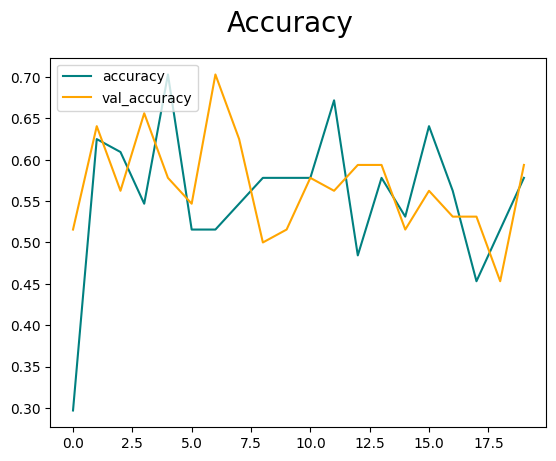

In [ ]:
# plotting model accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')

fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

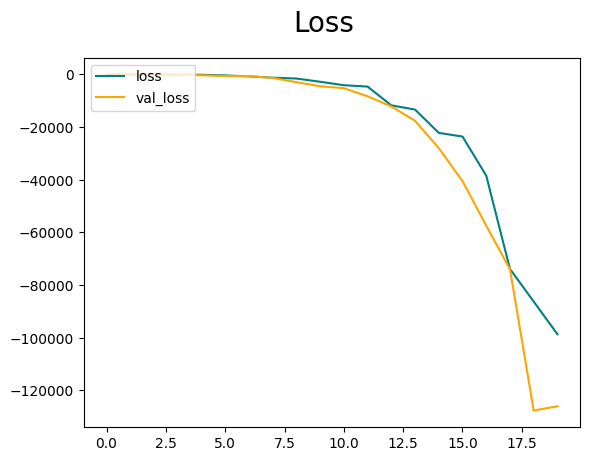

In [ ]:
# plotting model loss
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')

fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

**EVALUATING PERFORMANCE**

In [ ]:
# evaluating on testing data finally
# importing required dependencies
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
ac = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x) # predicting for each batch
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  ac.update_state(y,yhat)

In [ ]:
print(f"Precision: {pre.result()}\nRecall: {re.result()}\nAccuracy: {ac.result()}")

Precision: 1.0
Recall: 1.0
Accuracy: 0.5806451439857483


**TESTING ON NEW DATA COMPLETELLY**

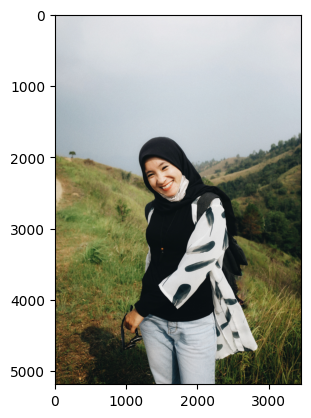

In [ ]:
img = cv2.imread('/content/happy person.jpg') # path to any test image uploaded in files
plt.imshow(cv2.cvtColor( img, cv2.COLOR_BGR2RGB))
plt.show()

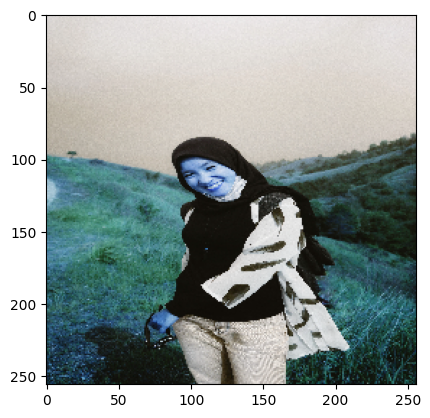

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat # 1 is happy 2 is sad, thus model has correctly preidicted

array([[1.]], dtype=float32)